In [5]:
import os
import glob
import cv2
import imgaug as ia 
import imgaug.augmenters as iaa
from pathlib import Path
import matplotlib.pyplot as plt

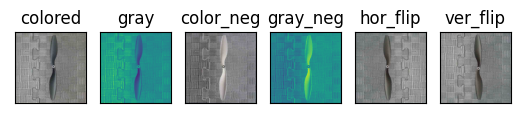

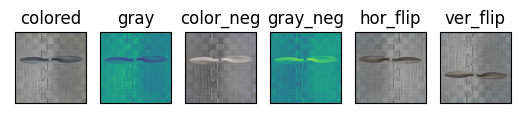

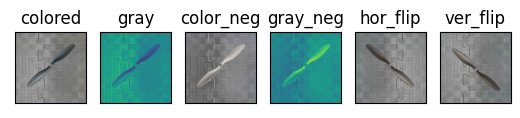

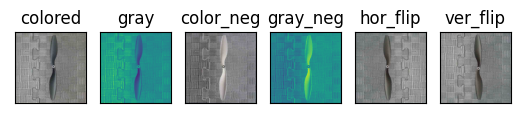

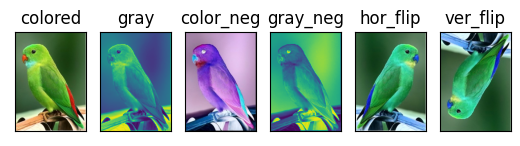

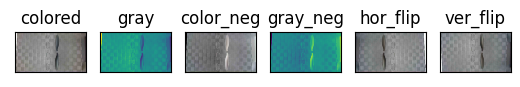

In [7]:
imdir = 'images/'
ext = ['jpg', 'jpeg']   

files = []
[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]

images = [cv2.imread(file) for file in files]
          
total_image = len(images)

for i in range(total_image):
    
    # color, gray 
    color_img = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    
    gray_img = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)
    
    #colored negative and gray negative
    colored_negative = abs(255 - color_img)
    gray_negative = abs(255 - gray_img)
    
    #Horizontal Flip
    hflip = iaa.Fliplr(p=1.0)
    hf_img = hflip.augment_image(images[i])

    #Vertical Flip
    vflip = iaa.Flipud(p=1.0)
    vf_img = vflip.augment_image(images[i])
            
    aug_img_list = [color_img, gray_img, colored_negative, gray_negative,
                    hf_img, vf_img]
    
    labels = ["colored", "gray", "color_neg", "gray_neg",
              "hor_flip", "ver_flip"]
    
    img_name = Path(files[i]).stem
        
    for j in range(len(labels)):
        
        #isWritten = cv2.imwrite('E:/Thesis_Task/Augmentation/augmented_images/'+img_name+'_'+labels[j]+'.jpg', aug_img_list[j])
        
        plt.subplot(1, 6, j+1)
        plt.title(labels[j])
        plt.imshow(aug_img_list[j])
        plt.xticks([])
        plt.yticks([])
        
    plt.show()